In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


# Sample datacyber_risk_dataset.csv
data = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\#projects\Hackathon\trends_by_date (1).csv")
print(data.head())

        risk_name  count        date  probability
0         Malware      2  2024-02-19     0.014085
1      Ransomware      0  2024-02-19     0.000000
2  Cloud Security      0  2024-02-19     0.000000
3         Malware      1  2024-02-18     0.007042
4      Ransomware      0  2024-02-18     0.000000


In [2]:
# Convert data to DataFrame
df = pd.DataFrame(data)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

In [4]:
df = df.dropna()

In [5]:
# Perform one-hot encoding on the 'hack_name' column
one_hot_encoded = pd.get_dummies(df['risk_name'], prefix='hack')

# Concatenate the one-hot encoded features with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'hack_name' column
df.drop(columns=['risk_name'], inplace=True)

print(df)

     count        date  probability  hack_Cloud Security  hack_Malware  \
0        2  2024-02-19     0.014085                    0             1   
1        0  2024-02-19     0.000000                    0             0   
2        0  2024-02-19     0.000000                    1             0   
3        1  2024-02-18     0.007042                    0             1   
4        0  2024-02-18     0.000000                    0             0   
..     ...         ...          ...                  ...           ...   
316      1  2023-06-28     0.007042                    0             0   
317      0  2023-06-28     0.000000                    1             0   
318      1  2023-06-27     0.007042                    0             1   
319      0  2023-06-27     0.000000                    0             0   
320      0  2023-06-27     0.000000                    1             0   

     hack_Ransomware  
0                  0  
1                  1  
2                  0  
3                  

In [6]:
df.set_index('date',inplace=True)
df.head()

,count,probability,hack_Cloud Security,hack_Malware,hack_Ransomware
date,,,,,
2024-02-19,2,0.014085,0,1,0
2024-02-19,0,0.000000,0,0,1
2024-02-19,0,0.000000,1,0,0
2024-02-18,1,0.007042,0,1,0
2024-02-18,0,0.000000,0,0,1


In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
for i in df.columns:
    #Checking the stationarity of the data
    if df[i].dtype != 'object':
        result = ts.adfuller(df[i])
        
        #Printing the test results
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

            #Interpreting the test results
            if result[1] <= 0.05:
                print(i,'is stationary')
            else:
                print(i,'is not stationary')
                print('   ')

ADF Statistic: -6.767906
p-value: 0.000000
Critical Values:
	1%: -3.451
count is stationary
	5%: -2.871
count is stationary
	10%: -2.572
count is stationary
ADF Statistic: -6.767906
p-value: 0.000000
Critical Values:
	1%: -3.451
probability is stationary
	5%: -2.871
probability is stationary
	10%: -2.572
probability is stationary
ADF Statistic: -29643100379028220.000000
p-value: 0.000000
Critical Values:
	1%: -3.451
hack_Cloud Security is stationary
	5%: -2.871
hack_Cloud Security is stationary
	10%: -2.572
hack_Cloud Security is stationary
ADF Statistic: -13561486675161058.000000
p-value: 0.000000
Critical Values:
	1%: -3.452
hack_Malware is stationary
	5%: -2.871
hack_Malware is stationary
	10%: -2.572
hack_Malware is stationary
ADF Statistic: -30090922575155656.000000
p-value: 0.000000
Critical Values:
	1%: -3.451
hack_Ransomware is stationary
	5%: -2.871
hack_Ransomware is stationary
	10%: -2.572
hack_Ransomware is stationary


In [9]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

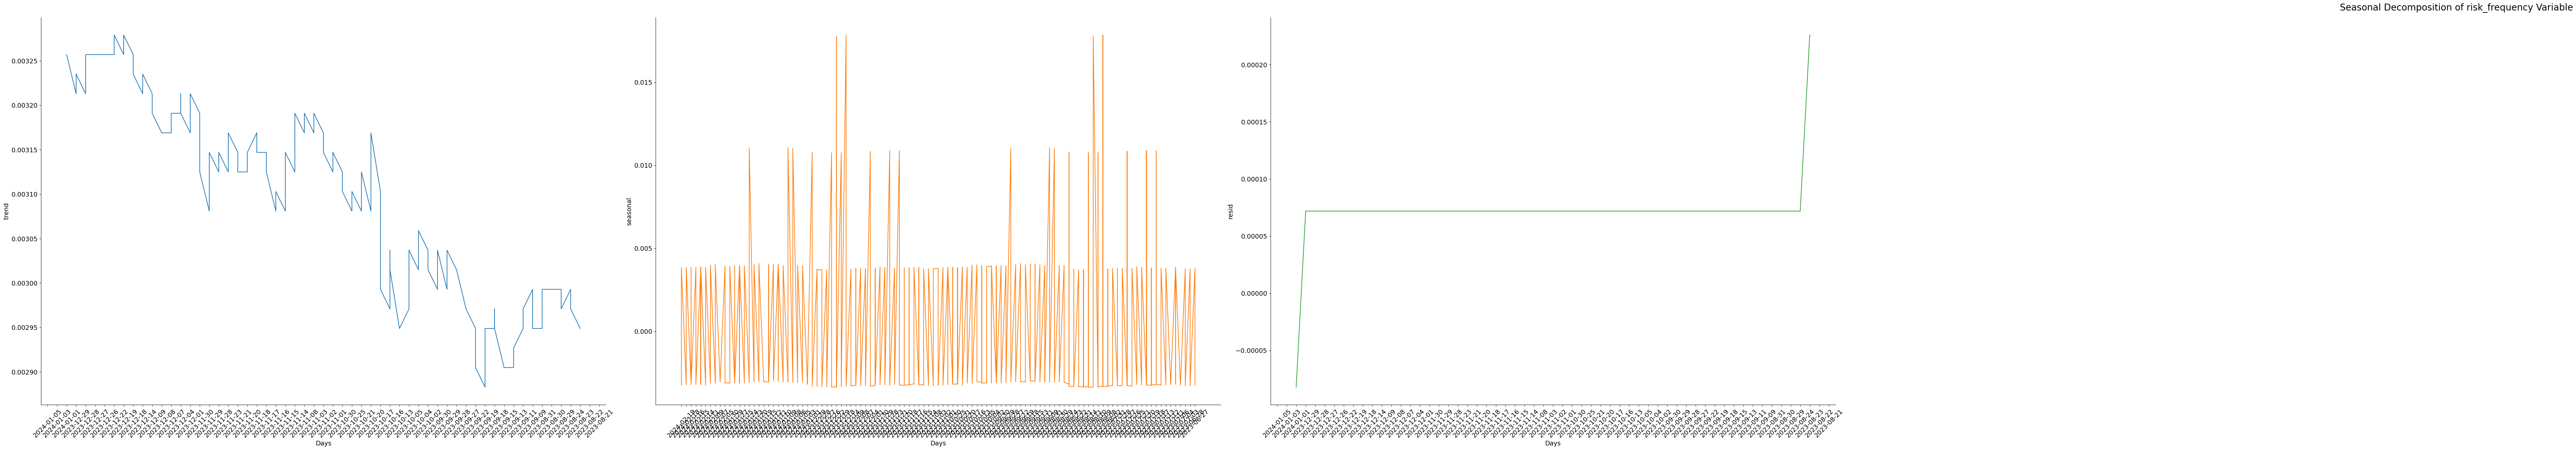

In [10]:
# Add seasonal decomposition for 'risk_frequency'
colors = plt.rcParams["axes.prop_cycle"]()
results = seasonal_decompose(df['probability'], period=160)
trend = results.trend
seasonal = results.seasonal
residual = results.resid
properties = [trend, seasonal, residual]
a = 1  # number of rows
b = 8  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(150, 14))
fig.suptitle(f'Seasonal Decomposition of risk_frequency Variable', fontsize=20)
for i in properties:
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(i, color=color)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Days')
    plt.ylabel(i.name)
    plt.xticks(rotation=45)
    c = c + 1
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

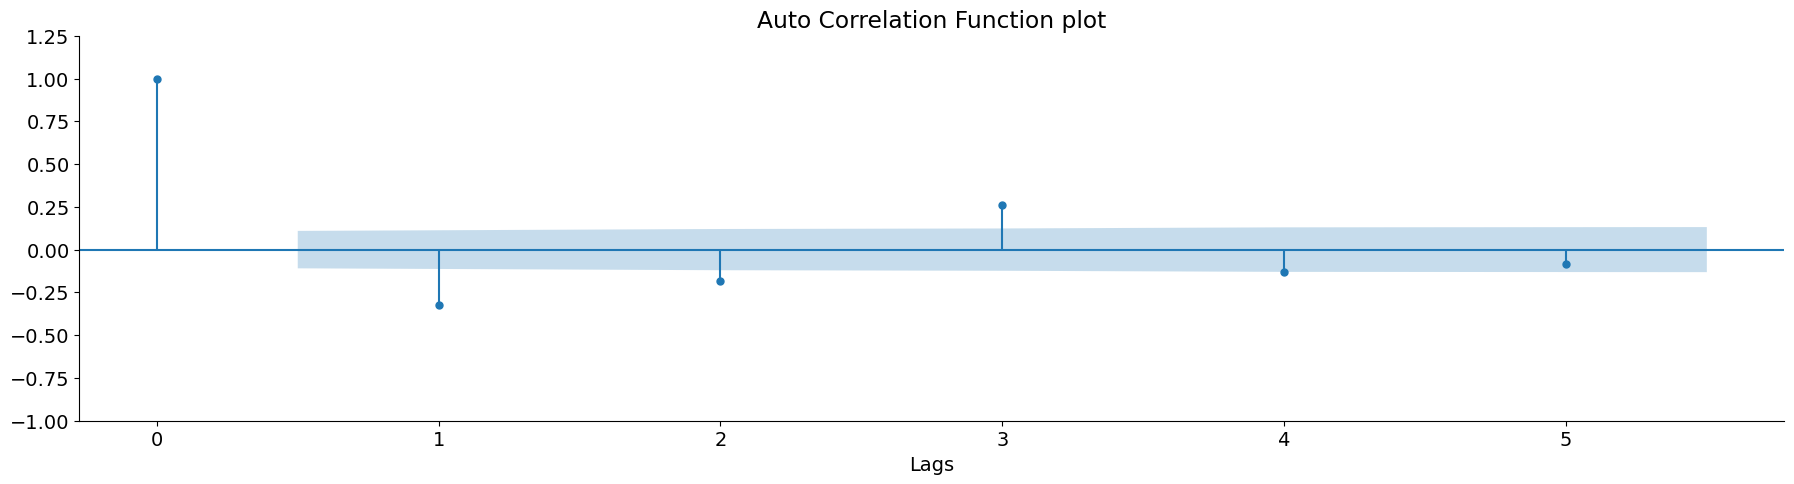

<Figure size 1500x600 with 0 Axes>

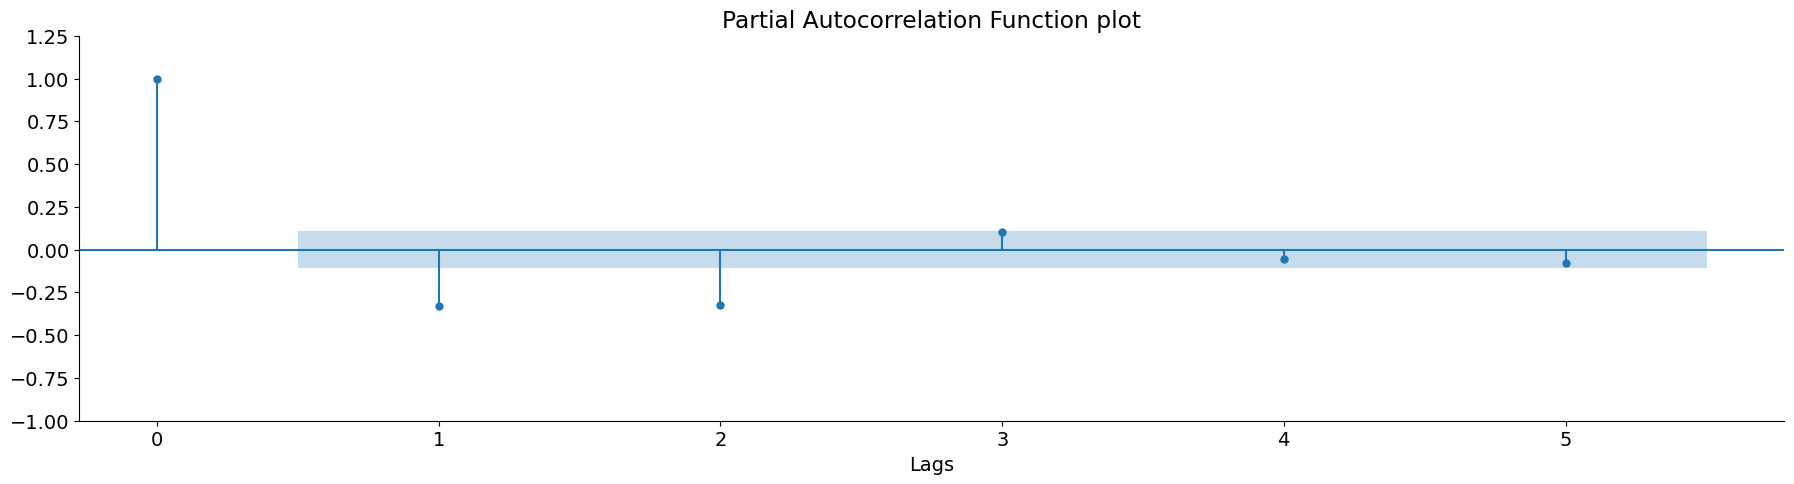

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot the ACF plot
plt.figure(figsize=(15, 6))
plot_acf(df['probability'], lags=5, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

# Plot the PACF plot
plt.figure(figsize=(15, 6))
plot_pacf(df['probability'], lags=5, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

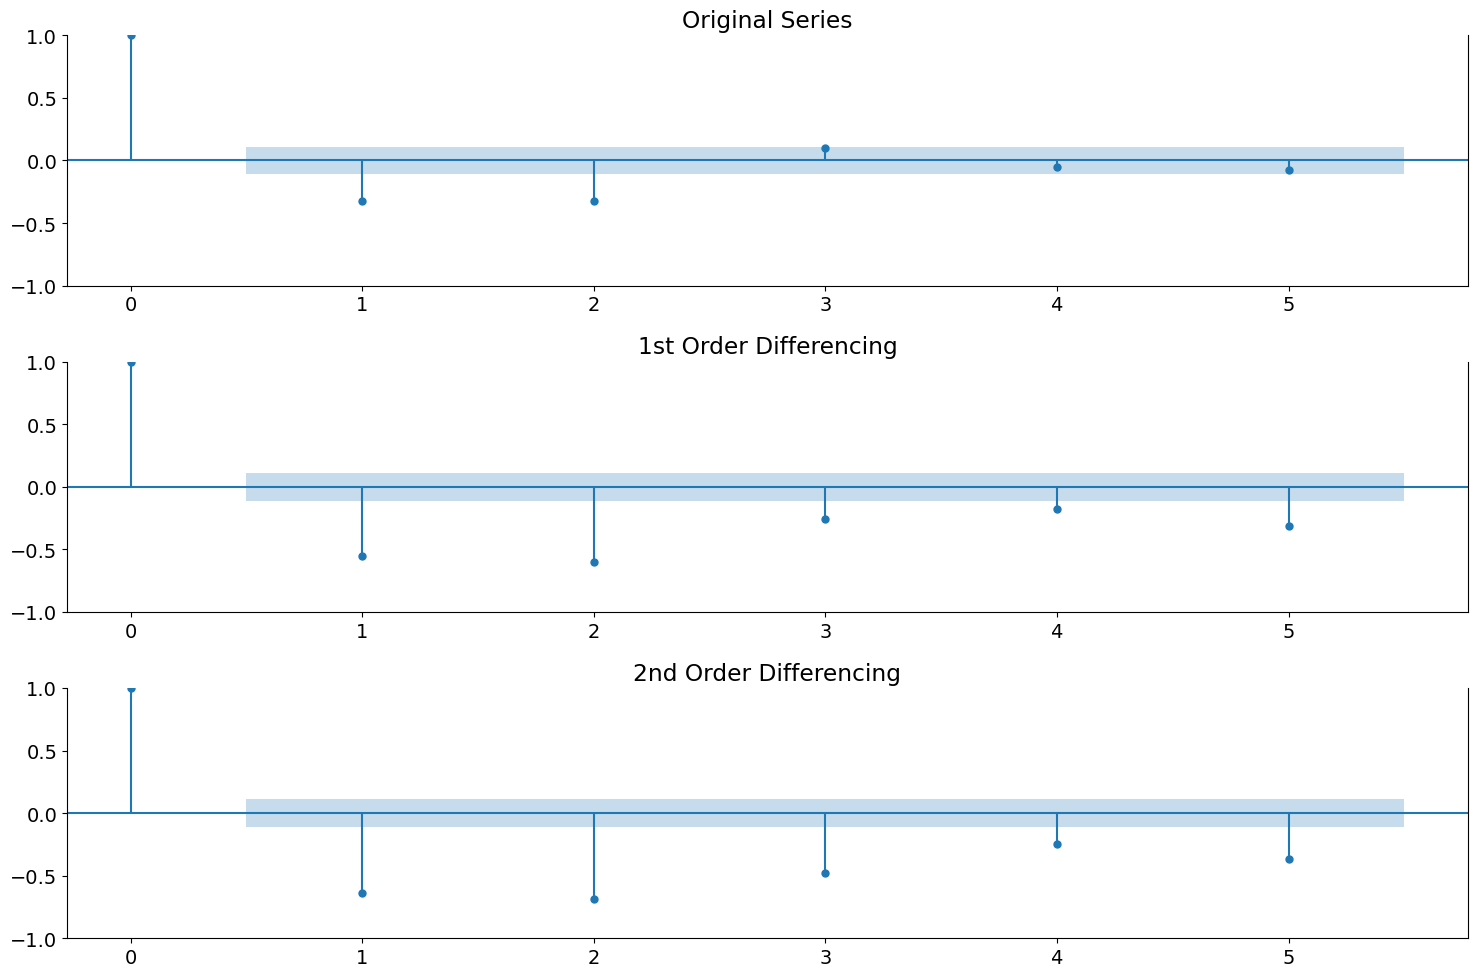

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(df['probability'], lags=5, ax=ax1, title='Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(df['probability'].diff().dropna(), lags=5, ax=ax2, title='1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_pacf(df['probability'].diff().diff().dropna(), lags=5, ax=ax3, title='2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

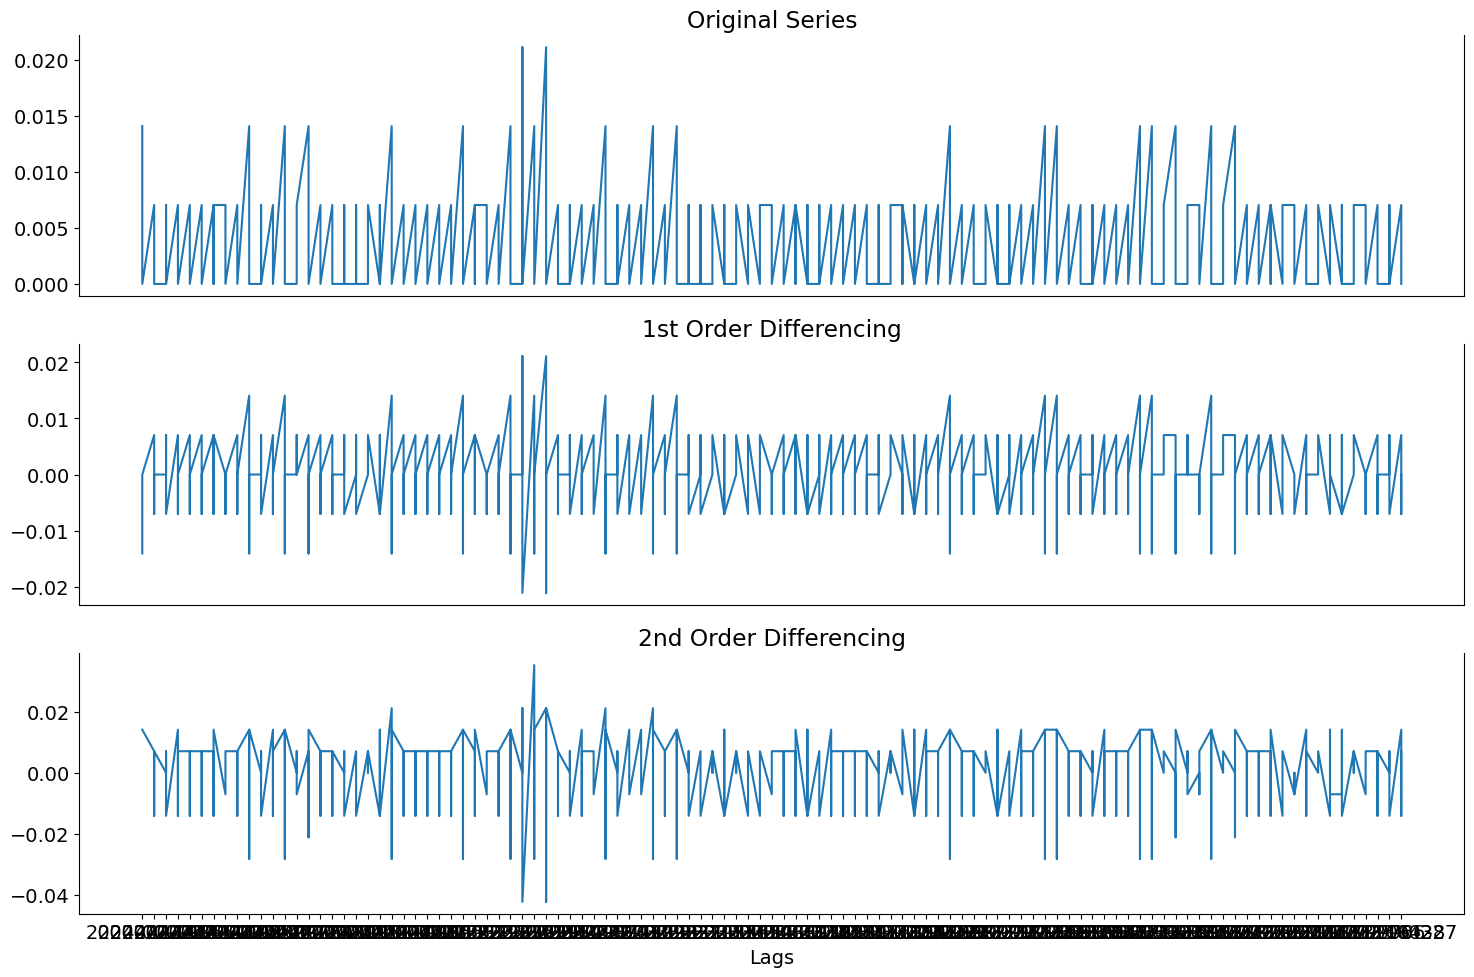

In [13]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(df['probability'])
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

# 1st Differencing
ax2.plot(df['probability'].diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

# 2nd Differencing
ax3.plot(df['probability'].diff().diff())
ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()

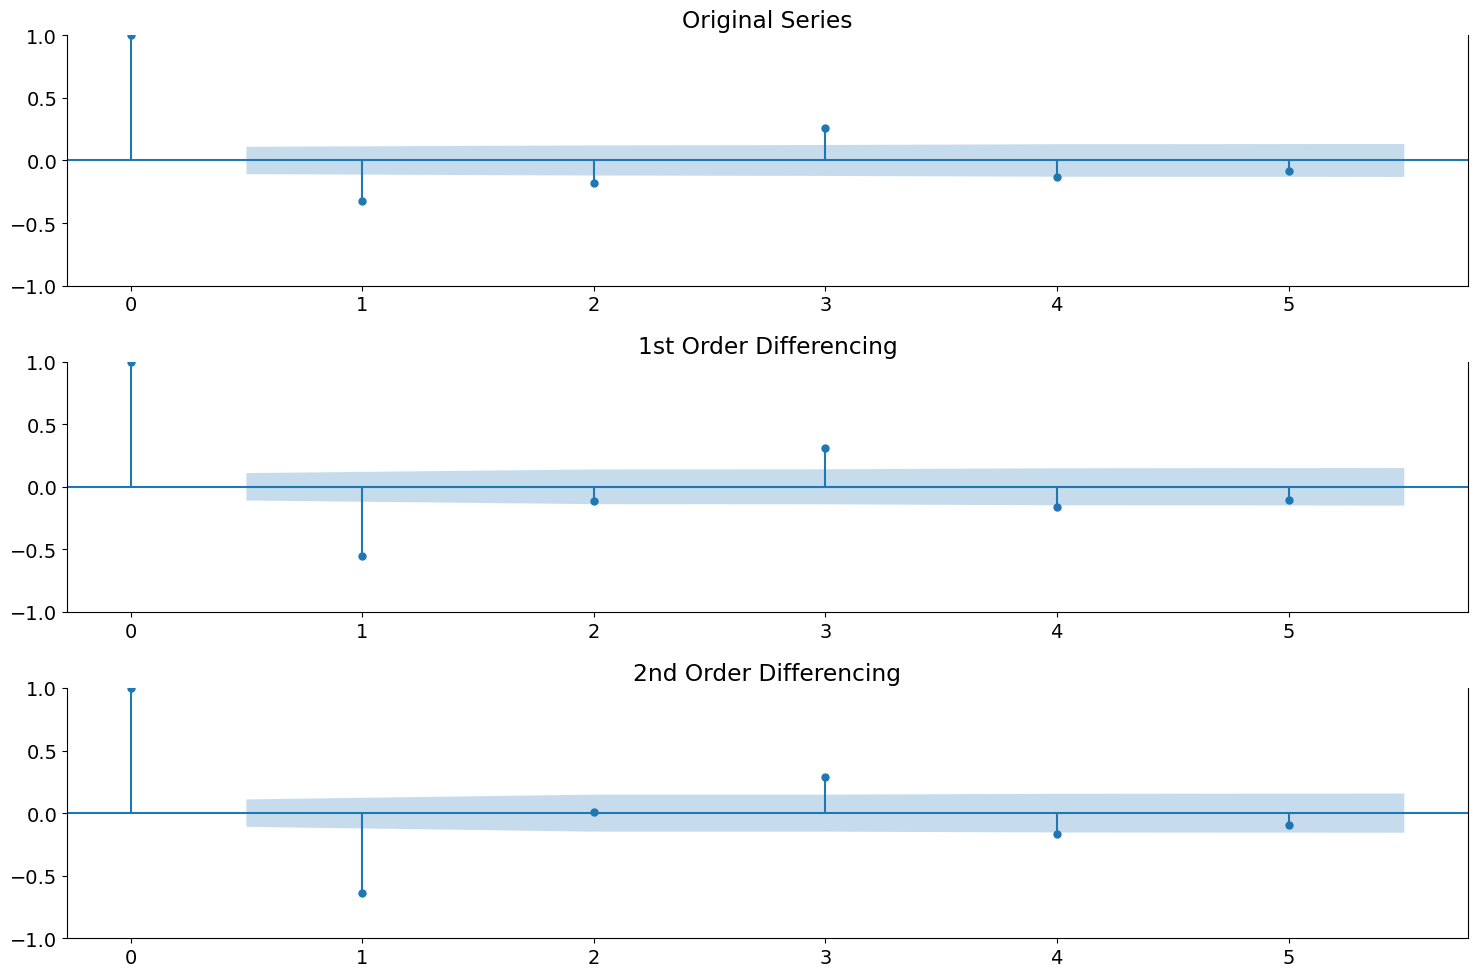

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_acf(df['probability'], ax=ax1, lags=5, title='Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(df['probability'].diff().dropna(), ax=ax2, lags=5, title='1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df['probability'].diff().diff().dropna(), ax=ax3, lags=5, title='2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets with reversed indices
split_index = int(len(df) * 0.2)
test_data = df.iloc[:split_index]
train_data = df.iloc[split_index:]

print("Test Data:")
print(test_data)

print("\nTrain Data:")
print(train_data)

Test Data:
            count  probability  hack_Cloud Security  hack_Malware  \
date                                                                
2024-02-19      2     0.014085                    0             1   
2024-02-19      0     0.000000                    0             0   
2024-02-19      0     0.000000                    1             0   
2024-02-18      1     0.007042                    0             1   
2024-02-18      0     0.000000                    0             0   
...           ...          ...                  ...           ...   
2024-01-11      1     0.007042                    1             0   
2024-01-10      0     0.000000                    0             1   
2024-01-10      1     0.007042                    0             0   
2024-01-10      0     0.000000                    1             0   
2024-01-09      2     0.014085                    0             1   

            hack_Ransomware  
date                         
2024-02-19                0  
2

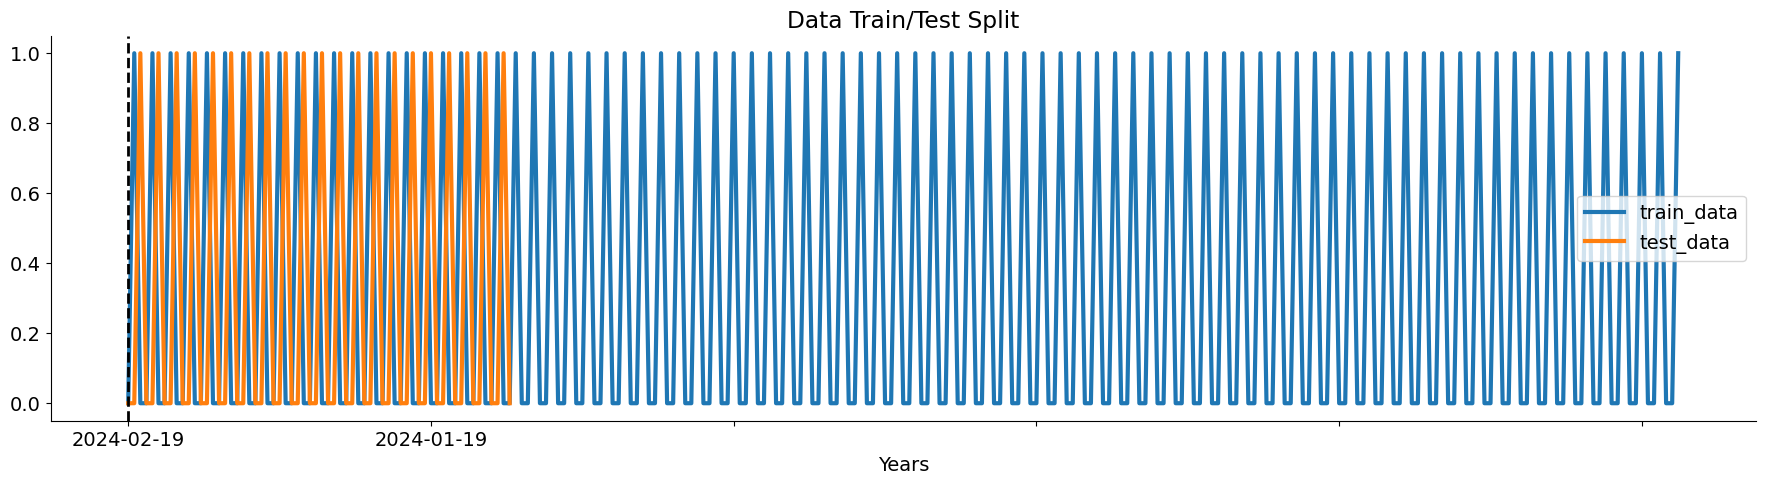

In [52]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
train_data['hack_Cloud Security'].plot(ax=ax, label='train_data', title='Data Train/Test Split', linewidth=3)

# Plot the Volume column from the test set on the axis
test_data['hack_Cloud Security'].plot(ax=ax, label='test_data',  linewidth=3)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline('2023-01-02', color='black', ls='--', lw=2)

# Add a legend to the plot
ax.legend(['train_data', 'test_data'])

# Label the x-axis
ax.set_xlabel('Years')

# Show the plot
plt.show()

In [53]:
print(f'There are {train_data.shape[0]} rows in the training set and {test_data.shape[0]} rows in the test set')

There are 257 rows in the training set and 64 rows in the test set


In [54]:
exogenous_features = ['hack_Cloud Security','hack_Malware','hack_Ransomware']
train_data = train_data[train_data.columns]
test_data = test_data[test_data.columns]

In [55]:
train_data.head()

,count,probability,hack_Cloud Security,hack_Malware,hack_Ransomware
date,,,,,
2024-01-09,0,0.000000,0,0,1
2024-01-09,0,0.000000,1,0,0
2024-01-08,1,0.007042,0,1,0
2024-01-08,0,0.000000,0,0,1
2024-01-08,0,0.000000,1,0,0


In [56]:
model = sm.tsa.arima.ARIMA(endog=train_data['probability'], exog=train_data[exogenous_features], order=(1, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            probability   No. Observations:                  257
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1047.422
Date:                Wed, 21 Feb 2024   AIC                          -2082.844
Time:                        03:15:56   BIC                          -2061.572
Sample:                             0   HQIC                         -2074.288
                                - 257                                         
Covariance Type:                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
hack_Cloud Security    -0.0017      0.000     -4.076      0.000      -0.003      -0.001
hack_Malware            0.0029      0.000      9.044      0.000       0.002       0.004
hack_Ransomware        -0.0012      0.000     -3.029      0.002      -0.002      -0.000
ar.L1                  -0.1313      0.077     -1.706      0.088      -0.282       0.020
ma.L1                  -0.8645      0.060    -14.402      0.000      -0.982      -0.747
sigma2               1.624e-05   1.21e-06     13.444      0.000    1.39e-05    1.86e-05
===================================================================================
Ljung-Box (L1) (Q):                  13.46   Jarque-Bera (JB):                60.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.94
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.54e+16. Standard errors may be unstable.
"""

In [57]:
train_data['Predictions'] = model_fit.predict()

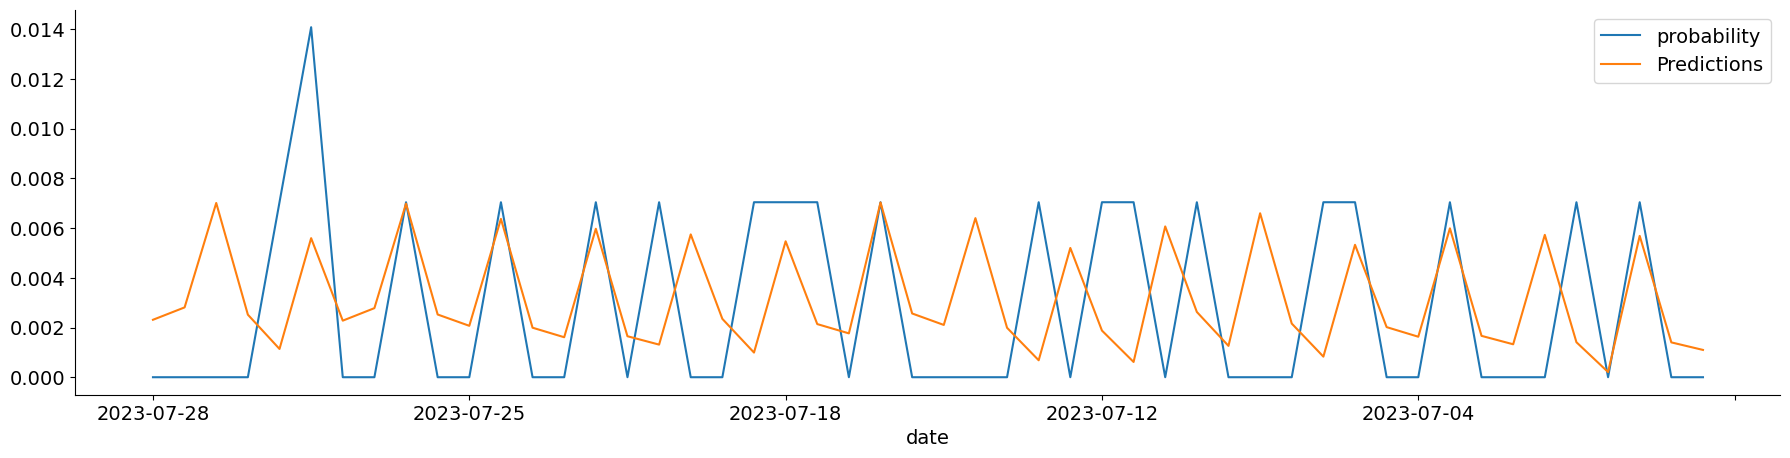

In [58]:
train_data[['probability', 'Predictions']][-50:].plot()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [59]:
#Making Predictions on Test Set(Forecast future values)
forecast = [model_fit.forecast(exog=test_data[exogenous_features].iloc[i]).values[0] for i in range(len(test_data))]

test_data['Forecast'] = forecast


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa

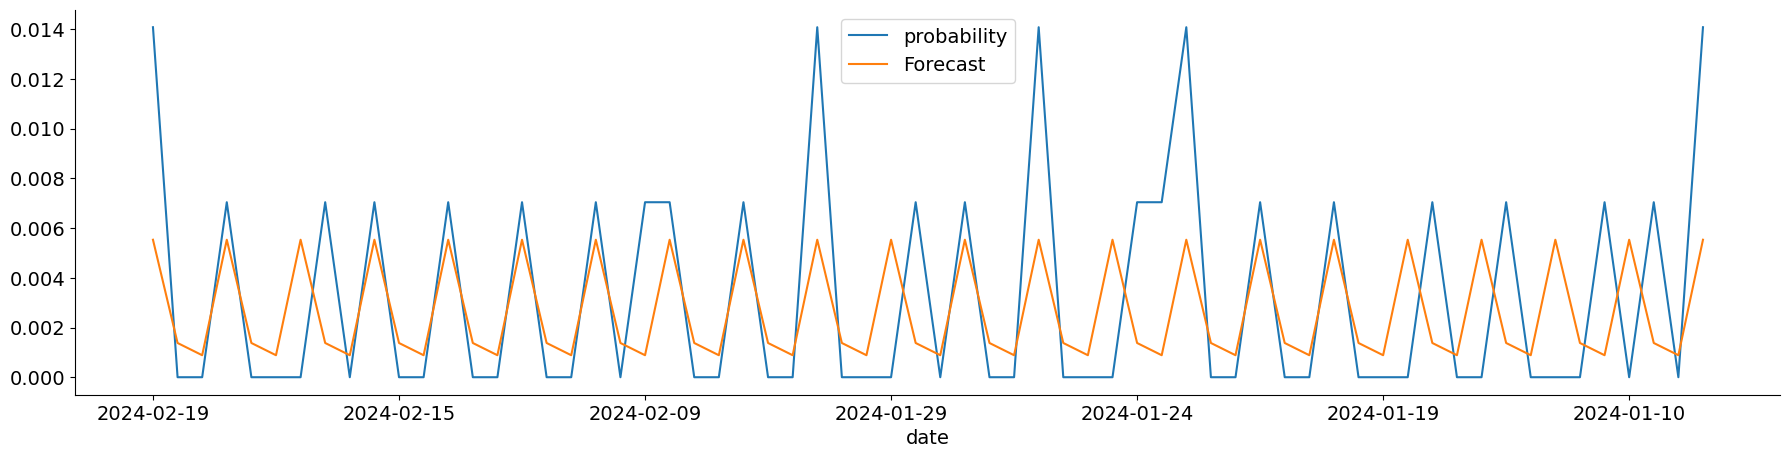

In [60]:
test_data[['probability','Forecast']][-450:].plot()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['probability'],test_data['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 0.0039


In [64]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(train_data['probability'] ,train_data['Predictions'])
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Absolute Error (MAE): 0.0031


In [73]:
test['probability'].mean()

0.0031558646484717233